### Importing the packages

In [1]:
# Importing the libraries
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, Input
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.utils import to_categorical
import warnings
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")
import pandas as pd
import cv2
from tqdm import tqdm
import glob
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import os


# if there isn't cuda enabled gpu in the system, remove or comment the lines below
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
tf.debugging.set_log_device_placement(True)

Num GPUs Available:  1


### Loading the dataset

In [2]:
# loading the datas
images = []
labels = []
# Location with subdirectories
train_path = "trafficsigns_dataset/"
# Get List of all images
files = glob.glob(train_path + '/**/*.png', recursive=True)
# For each image
for file in  tqdm (files):
    #print(file.split('\\'))
    # Get File name and extension
    #filename = os.path.basename(file)
    img = cv2.imread(file,0)
    #img = cv2.resize(img,(120,120))
    #print(filename)
    images.append(img)
    y = file.split('\\')[1]
    #print(y)
    labels.append(y)
images = np.array(images)
labels = np.array(labels)


100%|██████████| 3699/3699 [00:00<00:00, 7614.64it/s]


### Data Analysis

In [3]:
# shape of images
print("Shape of train_data = ", images.shape)

Shape of train_data =  (3699, 28, 28)


In [4]:
# shape of labels 
print("Shape of train_labels = ", labels.shape)

Shape of train_labels =  (3699,)


In [5]:
print("The shape of min value of pixel in data is {} and max value is {}.".format(images.min(),images.max()))

The shape of min value of pixel in data is 0 and max value is 255.


In [6]:
unique, counts = np.unique(labels, return_counts=True)
print (np.asarray((unique, counts)).T)

[['diamond' '282']
 ['hex' '43']
 ['round' '1760']
 ['square' '688']
 ['triangle' '926']]


In [7]:
images = (images/255).astype('float32')

round       1760
triangle     926
square       688
diamond      282
hex           43
Name: labels, dtype: int64


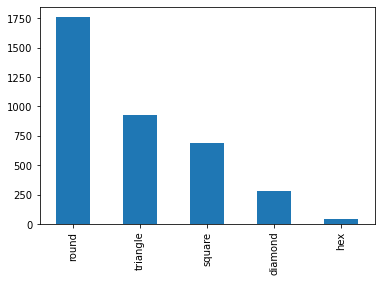

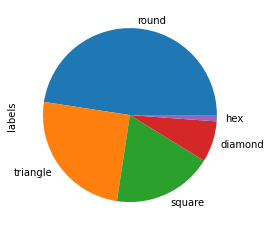

In [8]:
# storing the labels in the data frame
labels_df = pd.DataFrame(labels,columns=['labels'])

print(labels_df['labels'].value_counts())
plt.figure()
labels_df['labels'].value_counts().plot.bar()
plt.show()
plt.figure()
labels_df['labels'].value_counts().plot.pie()
plt.show()

##### Observation:
- The dataset is imbalanced.

### Plot Some Random Images

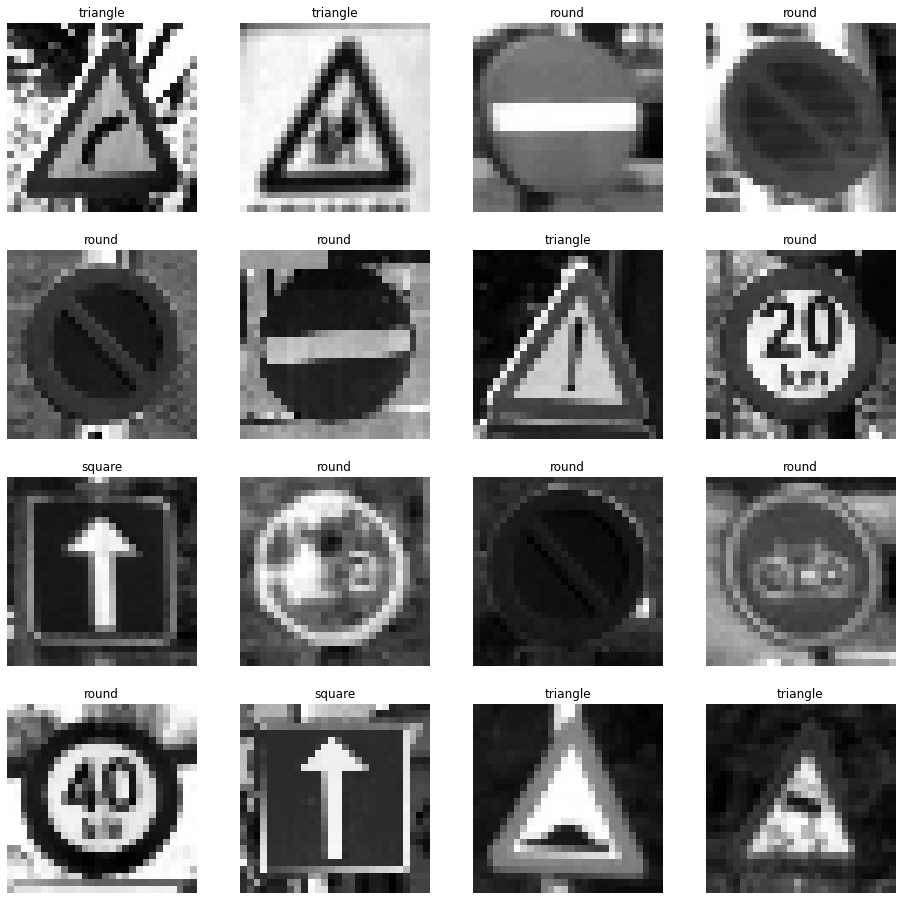

In [9]:
# This helps visualize the images
np.random.seed(42)
plt.figure(1 , figsize = (16 , 16))

for n in range(1, 17):
    plt.subplot(4, 4, n)
    index = int(np.random.randint(0, images.shape[0], 1))
    plt.title(str(labels[index]))
    plt.imshow(images[index],cmap='gray')
    plt.axis('off')

### Label Encoding the Class labels

In [10]:
# label encoding of categorical features
le = LabelEncoder()
labels = le.fit_transform(labels)
# onre hot encoding to feed it into model.
labels =to_categorical(labels)

### Reshape images for CNN

In [11]:
print("OLD_shape = ",images.shape)
images = images.reshape(images.shape[0],images.shape[1],images.shape[2],1)
print("New_shape = ",images.shape)

OLD_shape =  (3699, 28, 28)
New_shape =  (3699, 28, 28, 1)


### Train test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.33, random_state=42)

### Real time accuracy loss plots

In [13]:

class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.acc = []
        self.val_acc = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.acc.append(logs.get('accuracy'))
        self.val_acc.append(logs.get('val_accuracy'))
        self.i += 1
        f, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
        
        clear_output(wait=True)
        
        ax1.set_yscale('log')
        ax1.plot(self.x, self.losses, label="loss")
        ax1.plot(self.x, self.val_losses, label="val_loss")
        ax1.legend()
        
        ax2.plot(self.x, self.acc, label="accuracy")
        ax2.plot(self.x, self.val_acc, label="validation accuracy")
        ax2.legend()
        
        plt.show();
        
accuracy_loss_plot = PlotLearning()

### Deep Learning Model

### Model Initialization

In [20]:
i = Input(shape=(28, 28,1))
x = Conv2D(filters=32, kernel_size=(3, 3))(i)
x = BatchNormalization()(x)
x = Activation('leaky_relu')(x)
x = MaxPooling2D()(x)




x = Flatten()(x)
x = Dense(units=256)(x)
x = Activation('leaky_relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=128)(x)
x = Activation('leaky_relu')(x)
#x = Dropout(0.3)(x)
x = Dense(units=5)(x)
x = Activation('softmax')(x)

model = Model(inputs=i, outputs=x)

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AddV2 in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op DestroyResourceOp in device /job:local

### Compiling the model

In [21]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0


### Training the model

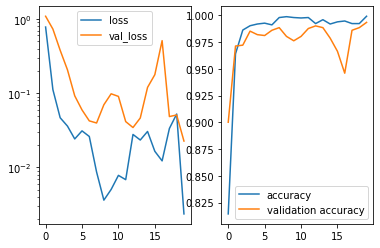

78/78 [==============================] - 1s 18ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 0.0226 - val_accuracy: 0.9934


In [22]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, callbacks=[accuracy_loss_plot])

### Model Evaluation

In [23]:
# get model predictions
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=-1)
y_true = np.argmax(y_test,axis=-1)



Executing op _EagerConst in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op RangeDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op PrefetchDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op FlatMapDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op TensorDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RepeatDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ZipDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ParallelMapDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op OptionsDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ReadVariableOp in device /job:localhost/replica:0/task:0/device:GPU:0
Executing op 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       107
           1       1.00      1.00      1.00        18
           2       0.99      0.99      0.99       581
           3       0.99      1.00      0.99       224
           4       0.99      1.00      0.99       291

    accuracy                           0.99      1221
   macro avg       1.00      0.99      0.99      1221
weighted avg       0.99      0.99      0.99      1221



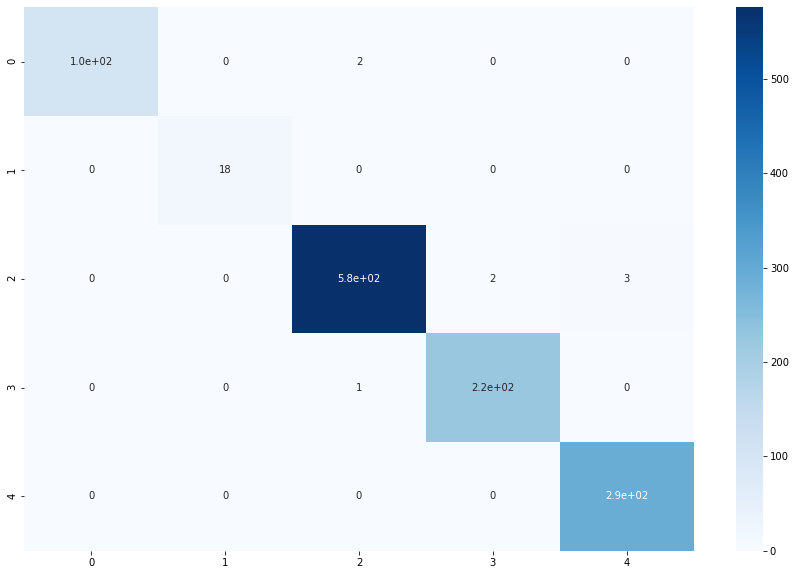

In [26]:
# print # classification Report
print(classification_report(y_true,y_pred))
cm = confusion_matrix(y_true,y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True,cmap="Blues") 
plt.show()